<a href="https://colab.research.google.com/github/janjuatest/Public-Sector/blob/main/Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dfwho=pd.read_csv('WHO.csv')

In [5]:
dfwho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Name                                                238 non-null    object 
 1   WHO Region                                          237 non-null    object 
 2   Cases - cumulative total                            238 non-null    int64  
 3   Cases - cumulative total per 1 million population   237 non-null    float64
 4   Cases - newly reported in last 7 days               238 non-null    int64  
 5   Cases - newly reported in last 24 hours             238 non-null    int64  
 6   Deaths - cumulative total                           238 non-null    int64  
 7   Deaths - cumulative total per 1 million population  237 non-null    float64
 8   Deaths - newly reported in last 7 days              238 non-null    int64  
 9  

In [6]:
dfwho.columns=['Country','Region','TotalCases','TotalCasesM','Cases7','Cases24h','DeathsT','DeathsTM','Death7','Deaths24h','Class']

In [7]:
dfwho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      238 non-null    object 
 1   Region       237 non-null    object 
 2   TotalCases   238 non-null    int64  
 3   TotalCasesM  237 non-null    float64
 4   Cases7       238 non-null    int64  
 5   Cases24h     238 non-null    int64  
 6   DeathsT      238 non-null    int64  
 7   DeathsTM     237 non-null    float64
 8   Death7       238 non-null    int64  
 9   Deaths24h    238 non-null    int64  
 10  Class        237 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 20.6+ KB


In [8]:
sum(dfwho['Country']=='Pakistan')

1

In [9]:
dfwhoSorted=dfwho.sort_values('DeathsTM',ascending=False)

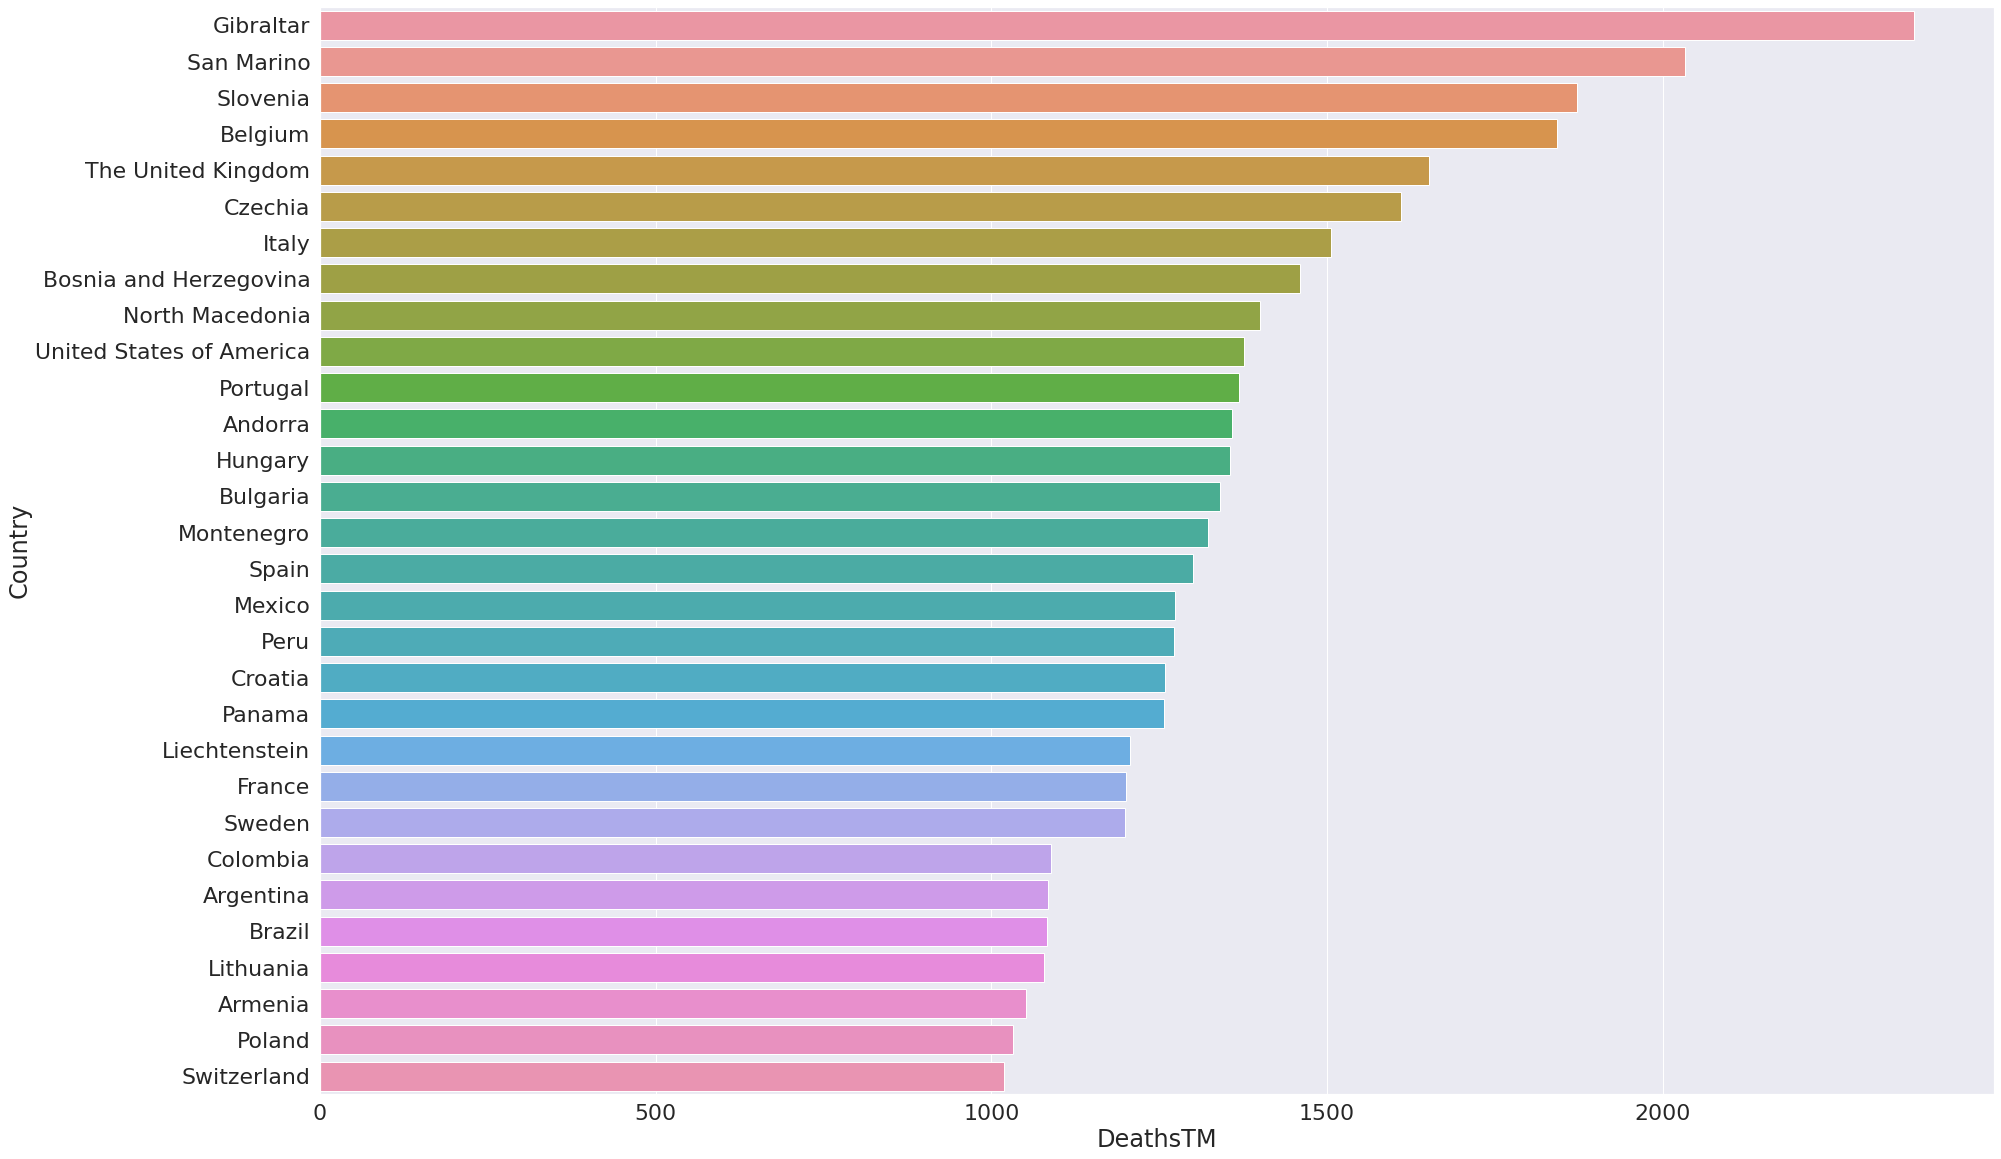

In [14]:
plt.figure(figsize=(30,20))
sns. set(font_scale=2)
sns.barplot(data=dfwhoSorted.head(30),y='Country',x='DeathsTM')

In [15]:
!pip install -U wbdata

In [16]:
import wbdata,datetime

In [18]:
wbdata.get_country("USA")

id    name
----  -------------
USA   United States

In [19]:
countries = [i['id'] for i in wbdata.get_country()] 

In [20]:
len(countries)

297

In [105]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"SP.POP.DPND":"PopDep","IC.BUS.EASE.XQ": "EaseofB","NY.GDP.PCAP.PP.CD":"GDPpppPC","SH.STA.DIAB.ZS":"DiabetesPrev","SP.POP.GROW":"PopGrowth","SP.URB.TOTL.IN.ZS":"UrbanPop"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df1=pd.concat([wbdf1,wbdf2],axis=0)

In [106]:
df1

,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop
country,,,,,,
Aruba,46.367454,NaN,NaN,11.6,0.442122,43.546
Afghanistan,82.109775,173.0,2156.419482,9.2,2.311817,25.754
Angola,95.394042,177.0,6965.511374,4.5,3.242983,66.177
Albania,46.203522,82.0,14496.127683,9.0,-0.426007,61.229
Andorra,NaN,NaN,NaN,7.7,0.176454,87.984
...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,NaN,-0.157992,NaN
"Yemen, Rep.",72.787716,187.0,NaN,5.4,2.300580,37.273
South Africa,52.400879,84.0,13034.164661,12.7,1.338617,66.856


In [113]:
data_date = datetime.datetime(2016, 1,1), datetime.datetime(2016, 1, 1)
indicator1={"SE.XPD.TOTL.GD.ZS":"GexpEdu","MS.MIL.XPND.GD.ZS": "MilExpGdp","SH.MED.PHYS.ZS":"HosBedP1000","SP.DYN.LE00.IN":"LifeExp"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [117]:
wbdf=pd.concat([df1,df2],axis=1)

In [120]:
wbdf.isnull().sum()

PopDep           25
EaseofB          75
GDPpppPC         32
DiabetesPrev      8
PopGrowth         2
UrbanPop          4
GexpEdu         122
MilExpGdp        71
HosBedP1000     151
LifeExp          17
dtype: int64

In [121]:
wbdf.reset_index(inplace=True)

In [122]:
wbdf

,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp
0,Aruba,46.367454,NaN,NaN,11.6,0.442122,43.546,5.52415,NaN,NaN,75.868000
1,Afghanistan,82.109775,173.0,2156.419482,9.2,2.311817,25.754,4.22836,0.956772,0.2782,63.763000
2,Angola,95.394042,177.0,6965.511374,4.5,3.242983,66.177,NaN,2.733341,NaN,59.925000
3,Albania,46.203522,82.0,14496.127683,9.0,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000
4,Andorra,NaN,NaN,NaN,7.7,0.176454,87.984,3.23707,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,NaN,57.0,11870.797576,NaN,-0.157992,NaN,NaN,0.773671,NaN,71.646341
259,"Yemen, Rep.",72.787716,187.0,NaN,5.4,2.300580,37.273,NaN,NaN,NaN,66.087000
260,South Africa,52.400879,84.0,13034.164661,12.7,1.338617,66.856,5.94285,1.075530,0.7997,63.153000
261,Zambia,87.188180,85.0,3624.024939,4.5,2.892373,44.072,3.74792,1.429305,0.1628,62.464000
